In [34]:
import pandas as pd

auto = pd.read_csv("../../data/Auto.csv", na_values='?').dropna().set_index("name")
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1


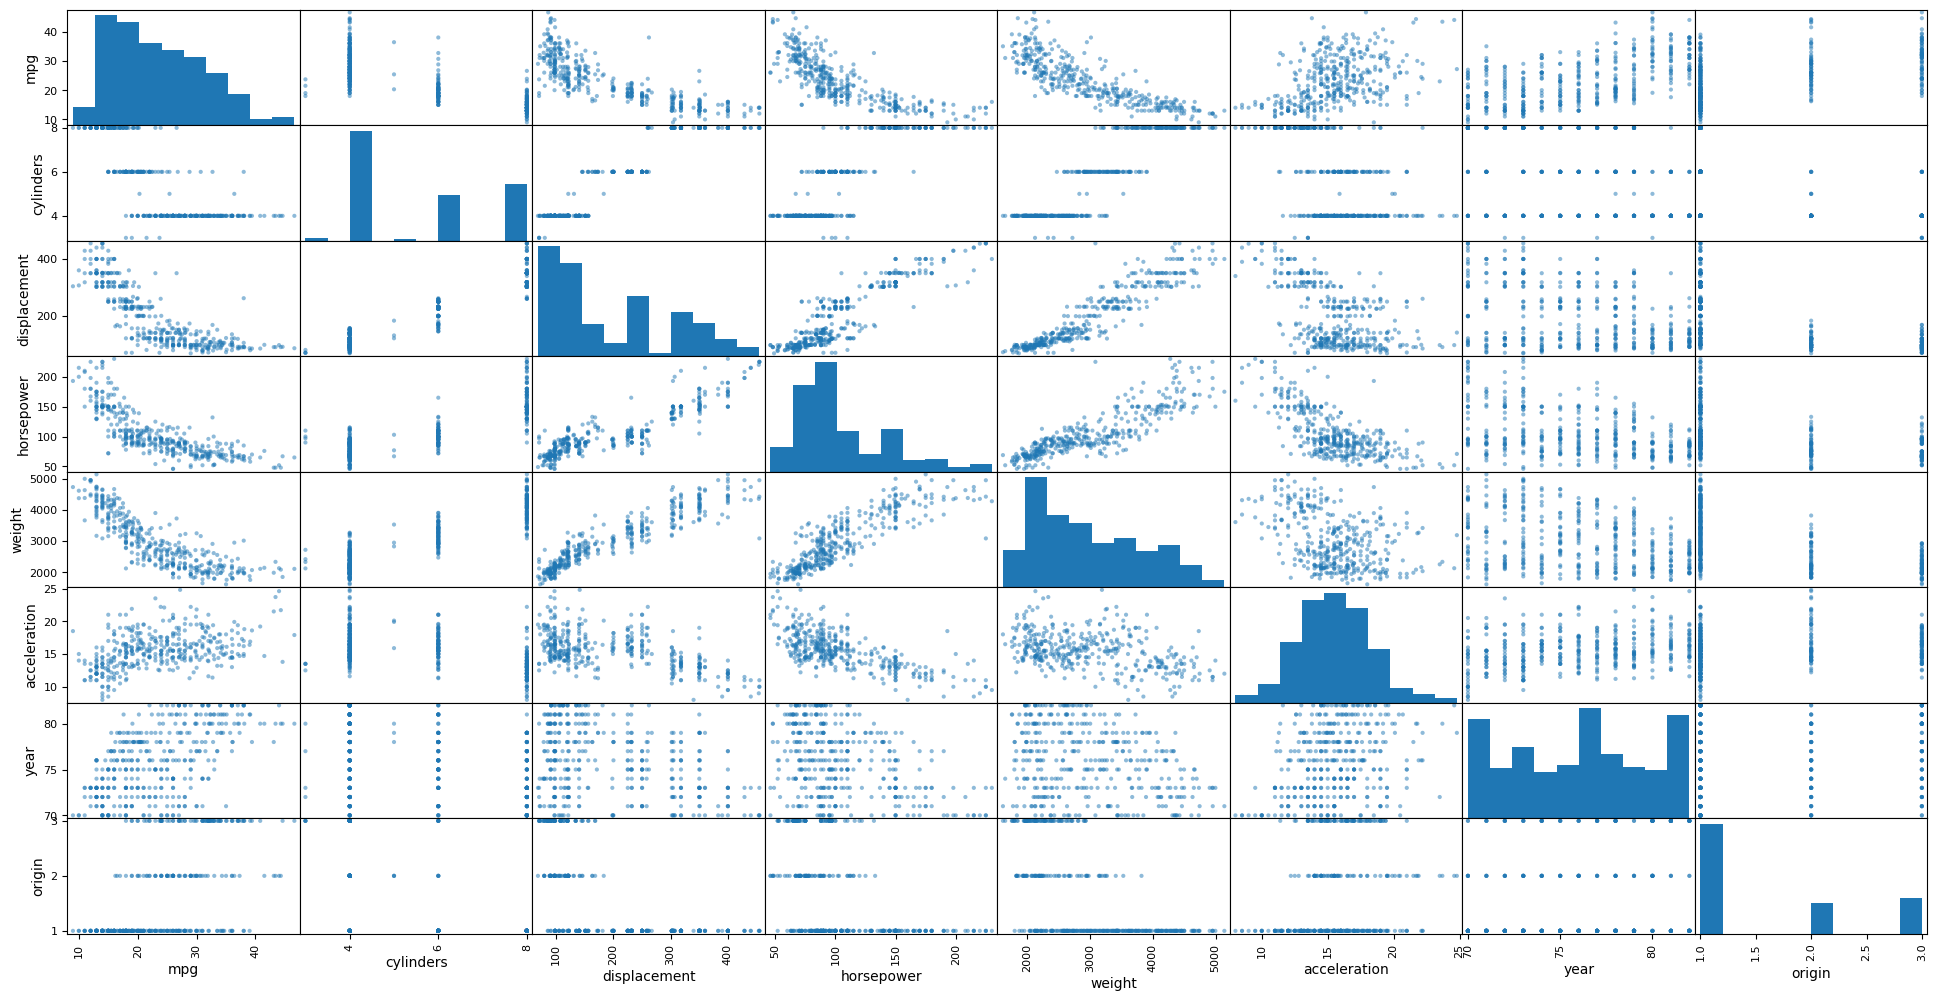

In [35]:
pd.plotting.scatter_matrix(auto, figsize=(24, 12));

In [36]:
import statsmodels.api as sm
from ISLP.models import ModelSpec as MS

predictors = auto.columns.drop("mpg")

x = MS(predictors).fit_transform(auto)
y = auto["mpg"]

results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 18 Jul 2025   Prob (F-statistic):          2.04e-139
Time:                        12:41:28   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
from statsmodels.stats.anova import anova_lm

x_null = MS().fit_transform(auto)

null_results = sm.OLS(y, x_null).fit()

anova_lm(null_results, results)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,391.0,23818.993469,0.0,NaN,NaN,NaN
1,384.0,4252.212530,7.0,19566.780939,252.428045,2.037106e-139


There is strong evidence of a relationship between the predictors and the response variable mpg. The output of anova_lm() shows an F-statistic of approximately 252.43 with a very small p-value ($\approx 2.04 × 10^{-139}$). This extremely low p-value indicates that the full model with all predictors provides a significantly better fit than the null model (which includes only the intercept). Therefore, we can reject the null hypothesis that all regression coefficients are zero and conclude that at least one predictor is significantly associated with mpg.

In [38]:
x_optimised = MS(["weight", "year", "origin"]).fit_transform(auto)

results_optimised = sm.OLS(y, x_optimised).fit()

results_optimised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 18 Jul 2025   Prob (F-statistic):          7.26e-143
Time:                        12:41:29   Log-Likelihood:                -1027.8
No. Observations:                 392   AIC:                             2064.
Df Residuals:                     388   BIC:                             2080.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -18.0459      4.001     -4.510      0.000     -25.913     -10.179
weight        -0.0060      0.000    -23.588      0.000      -0.006      -0.005
year           0.7571      0.048     15.668      0.000       0.662       0.852
origin         1.1504      0.259      4.439      0.000       0.641       1.660
==============================================================================
Omnibus:                       39.172   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.003
Skew:                           0.577   Prob(JB):                     3.13e-17
Kurtosis:                       4.823   Cond. No.                     7.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Predictors like weight, year, and origin appear to be statistically significant in predicting mpg, as their p-values are the lowest. To confirm this, we fit a model using only these three predictors. The resulting R-squared is slightly lower than that of the full model: 0.817 compared to 0.821. This suggests that a model using only these three predictors might be better suited, offering similar explanatory power with fewer variables.
The year coefficient (0.7508 in the full model) indicates that newer cars tend to have higher mpg, reflecting improvements in automotive technology and fuel efficiency over time. This positive relationship suggests that, on average, each additional model year is associated with an increase of approximately 0.75 mpg.

In [39]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


The correlation matrix indicates that several predictors have strong negative relationships with miles per gallon (mpg). Most notably, weight has the strongest negative correlation with mpg at −0.83, followed closely by displacement (−0.81), horsepower (−0.78), and cylinders (−0.78). This suggests that heavier cars, cars with larger engines, and cars with more cylinders all tend to have lower fuel efficiency.

However, these predictors are also highly correlated with each other. For example, the correlation between displacement and weight is 0.93, between displacement and cylinders is 0.95, and between horsepower and weight is 0.86. Such high inter-correlations point to multicollinearity, where multiple variables are providing overlapping information. Including all of these in a regression model can lead to instability in coefficient estimates and make interpretation more difficult.

Given these patterns, it is reasonable to retain only one of these highly correlated predictors. Weight was chosen because it shows the strongest individual correlation with mpg and serves as a good proxy for the others. By including only weight, the model avoids multicollinearity while still capturing most of the explanatory power. This choice helps simplify the model without significantly sacrificing its predictive accuracy.

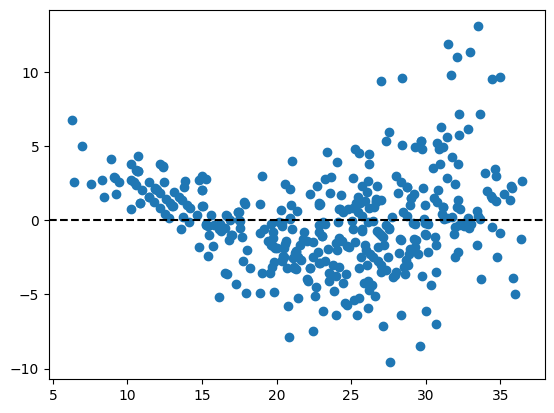

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fitted_values = results.fittedvalues
residuals = results.resid

ax.scatter(fitted_values, residuals);
ax.axhline(0, c="k", ls="--")

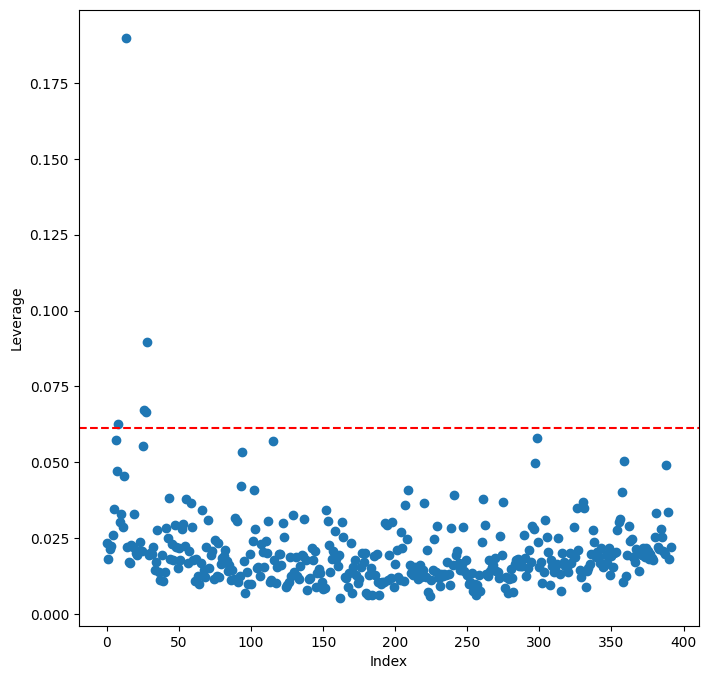

In [41]:
import numpy as np

infl = results.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(x.shape[0]), infl.hat_matrix_diag);
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
ax.axhline(3*x.shape[1] / x.shape[0], c='r', ls='--');

The residual plot clearly indicates non-linearity in the relationship between the predictors and mpg. Instead of being randomly scattered, the residuals exhibit a systematic pattern, suggesting that the current linear model may not fully capture the underlying data structure.

Additionally, the residual plot reveals several significant outliers, with multiple points falling well outside the \[-5, 5] range, pointing to potential issues within the dataset. The leverage plot highlights a few influential points exceeding the typical threshold of $\frac{3p}{n}$, with one point exhibiting a notably high leverage value of 0.2.

In [52]:
interactions = [("weight", "horsepower"), ("year", "origin")]
x_interactions = MS(list(predictors) + interactions).fit_transform(auto)

results_interactions = sm.OLS(y, x_interactions).fit()

results_interactions.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     268.6
Date:                Fri, 18 Jul 2025   Prob (F-statistic):          3.15e-159
Time:                        12:48:49   Log-Likelihood:                -970.81
No. Observations:                 392   AIC:                             1962.
Df Residuals:                     382   BIC:                             2001.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            17.5431      8.078      2.172      0.030       1.661      33.426
cylinders            -0.0500      0.287     -0.174      0.862      -0.614       0.514
displacement          0.0039      0.007      0.570      0.569      -0.009       0.017
horsepower           -0.2231      0.024     -9.366      0.000      -0.270      -0.176
weight               -0.0110      0.001    -15.031      0.000      -0.012      -0.010
acceleration         -0.0783      0.088     -0.887      0.376      -0.252       0.095
year                  0.5717      0.101      5.660      0.000       0.373       0.770
origin               -8.3415      4.209     -1.982      0.048     -16.617      -0.066
weight:horsepower  5.361e-05   5.26e-06     10.196      0.000    4.33e-05    6.39e-05
year:origin           0.1182      0.054      2.184      0.030       0.012       0.225
==============================================================================
Omnibus:                       40.900   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.030
Skew:                           0.634   Prob(JB):                     2.28e-16
Kurtosis:                       4.674   Cond. No.                     2.43e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Adding interaction terms to the model improved its overall performance, increasing the Adjusted R-squared from 0.821 to 0.860. Notably, the interaction between weight and horsepower has a highly significant positive effect on mpg, as indicated by its near-zero p-value and strong t-statistic. This suggests that the combined influence of these two variables on fuel efficiency is important beyond their individual effects.

In [58]:
from ISLP.models import poly

polynoms = [poly("weight", degree=2), poly("year", degree=2), poly("horsepower", degree=2)]

x_poly = MS(list(predictors) + polynoms).fit_transform(auto)

results_poly = sm.OLS(y, x_poly).fit()

results_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     266.7
Date:                Fri, 18 Jul 2025   Prob (F-statistic):          3.11e-165
Time:                        12:56:15   Log-Likelihood:                -953.62
No. Observations:                 392   AIC:                             1929.
Df Residuals:                     381   BIC:                             1973.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                        -7.2718      1.862     -3.906      0.000     -10.932      -3.611
cylinders                         0.2990      0.287      1.041      0.299      -0.266       0.864
displacement                     -0.0050      0.007     -0.710      0.478      -0.019       0.009
horsepower                       -0.0642      0.013     -4.987      0.000      -0.090      -0.039
weight                           -0.0037      0.001     -5.492      0.000      -0.005      -0.002
acceleration                     -0.1943      0.097     -2.010      0.045      -0.384      -0.004
year                              0.6535      0.023     27.816      0.000       0.607       0.700
origin                            0.7709      0.243      3.171      0.002       0.293       1.249
poly(weight, degree=2)[0]         1.2892      0.330      3.906      0.000       0.640       1.938
poly(weight, degree=2)[1]        20.1830      3.719      5.426      0.000      12.870      27.496
poly(year, degree=2)[0]           7.5941      1.942      3.910      0.000       3.776      11.413
poly(year, degree=2)[1]          17.0265      2.961      5.750      0.000      11.205      22.848
poly(horsepower, degree=2)[0]     0.9980      0.256      3.906      0.000       0.496       1.500
poly(horsepower, degree=2)[1]    20.4225      4.439      4.601      0.000      11.695      29.150
==============================================================================
Omnibus:                       42.233   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.357
Skew:                           0.538   Prob(JB):                     3.60e-23
Kurtosis:                       5.274   Cond. No.                     6.32e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.48e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Adding second-degree polynomial terms for weight, year, and horsepower significantly improved the model’s performance, increasing the Adjusted R-squared to 0.875. The highly significant p-values for these polynomial terms suggest that incorporating nonlinear relationships better captures the complexity in how these variables affect mpg. Key predictors such as horsepower, weight, acceleration, year, and origin remain statistically significant, emphasizing their importance. However, the model exhibits severe multicollinearity and near-singularity, as indicated by the extremely high condition number and very small eigenvalue, likely due to the polynomial terms. This may cause instability in coefficient estimates. Additionally, without a separate test set, it is difficult to determine whether the model is overfitting despite its improved fit, so further validation is necessary to assess its predictive reliability.